## Main Task
We aim to uncover long-term trends, seasonal patterns, and anomalies in India's rainfall data!  
The key objectives include analyzing historical rainfall data to uncover patterns and trends, detecting years or months with anomalous rainfall behavior, and exploring the relationships between seasonal and annual rainfall.

### Data Understanding
The given dataset spans from 1901 to 2015, which offers a comprehensive view of rainfall patterns across the country. It provides detailed monthly rainfall data, seasonal aggregations, and annual totals. The dataset is structured to include columns for each month (e.g., January to December), seasonal rainfall (e.g., Monsoon from June to September), and yearly aggregated rainfall figures.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("Dataset/rainfall_area.csv")

In [5]:
dataset.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


### Exploratory Data Analysis
#### What is the overall trend of annual rainfall over the years?

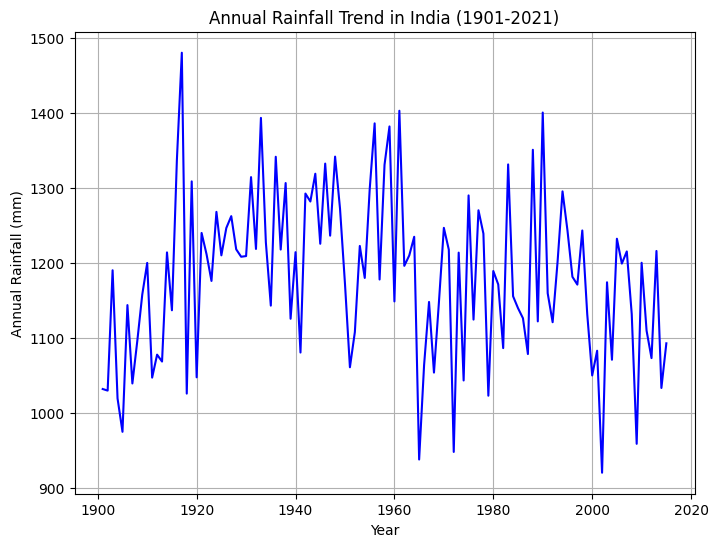

In [10]:
plt.figure(figsize=(8,6))
plt.plot(dataset['YEAR'], dataset['ANNUAL'], linestyle='-', color='blue')
plt.title('Annual Rainfall Trend in India (1901-2021)') 
plt.xlabel('Year') 
plt.ylabel('Annual Rainfall (mm)') 
plt.grid(True) 
plt.show()

> The above graph shows significant year-to-year variability in India’s annual rainfall, with no apparent long-term upward or downward trend over the century. Notable peaks and troughs highlight extreme rainfall events and dry years.